# **Assignment 2: *Adaline Model***
### **Name:**   Luigi Otoya
### **Course:** CSC 44700
##### Summary at the bottom.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# read data set
df = pd.read_csv('iris.csv', header = None)
df.tail(100)

,0,1,2,3,4
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


---

# **Six Cases Using Two Features**

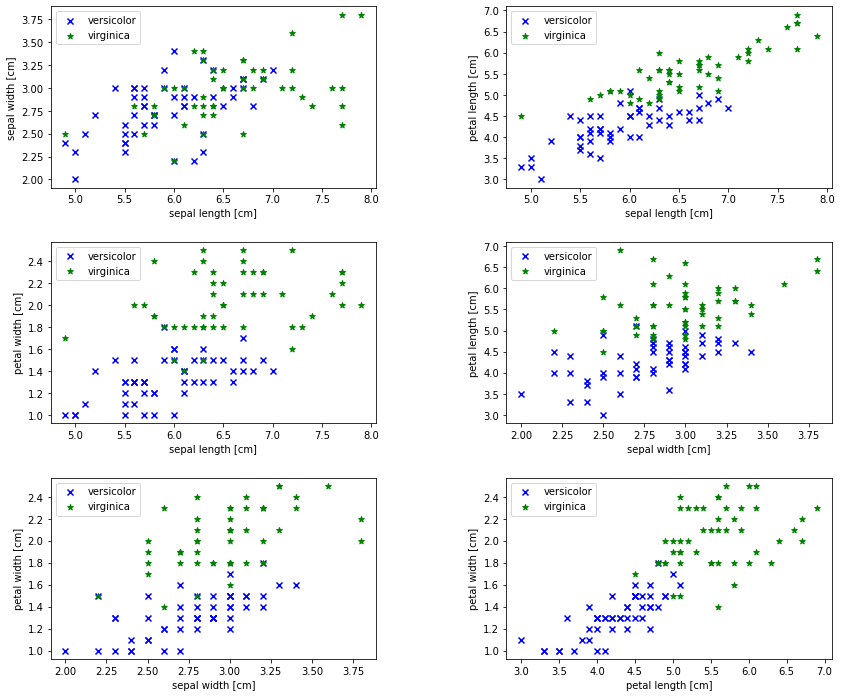

In [3]:
# 6 Permutations
# Iris Classifications
%matplotlib inline
# select Versicolor and Virginica
classIndex = [1,2]
y = df.iloc[50:150,4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

# extract sepal length and sepal width
X = df.iloc[50:150, [0,1]].values

# extract sepal length and petal length
X2 = df.iloc[50:150, [0,2]].values

# extract sepal length and petal width
X3 = df.iloc[50:150, [0,3]].values

# extract sepal width and petal legnth
X4 = df.iloc[50:150, [1,2]].values

#extract sepal width and petal width
X5 = df.iloc[50:150, [1,3]].values

#extract petal length and petal width
X6 = df.iloc[50:150, [2,3]].values


XF = np.array([X, X2, X3, X4, X5, X6])
XFname = np.array([['sepal length', 'sepal width'], 
                  ['sepal length', 'petal length'], 
                  ['sepal length', 'petal width'], 
                  ['sepal width', 'petal length'], 
                  ['sepal width', 'petal width'],
                  ['petal length', 'petal width']])
# plot data
rows = 3
cols = 2
n = 0
fig, axs = plt.subplots(nrows=rows, ncols= cols, figsize=(14, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.3)
for row in range(rows):
  for col in range(cols):
    axs[row,col].scatter(XF[n][:50, 0], XF[n][:50, 1], color='blue', marker='x', label ='versicolor')
    axs[row,col].scatter(XF[n][50:100, 0], XF[n][50:100, 1], color='green', marker='*', label='virginica')
    axs[row,col].set_xlabel(XFname[n][0] + ' [cm]')
    axs[row,col].set_ylabel(XFname[n][1] + ' [cm]')
    axs[row,col].legend(loc='upper left')
    n += 1

In [4]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    IC = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    markColor = ['red', 'blue', 'green']
    markers = ('o', 'x', '*')
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=markColor[classIndex[idx]],
                    marker=markers[classIndex[idx]], 
                    label=IC[classIndex[idx]])

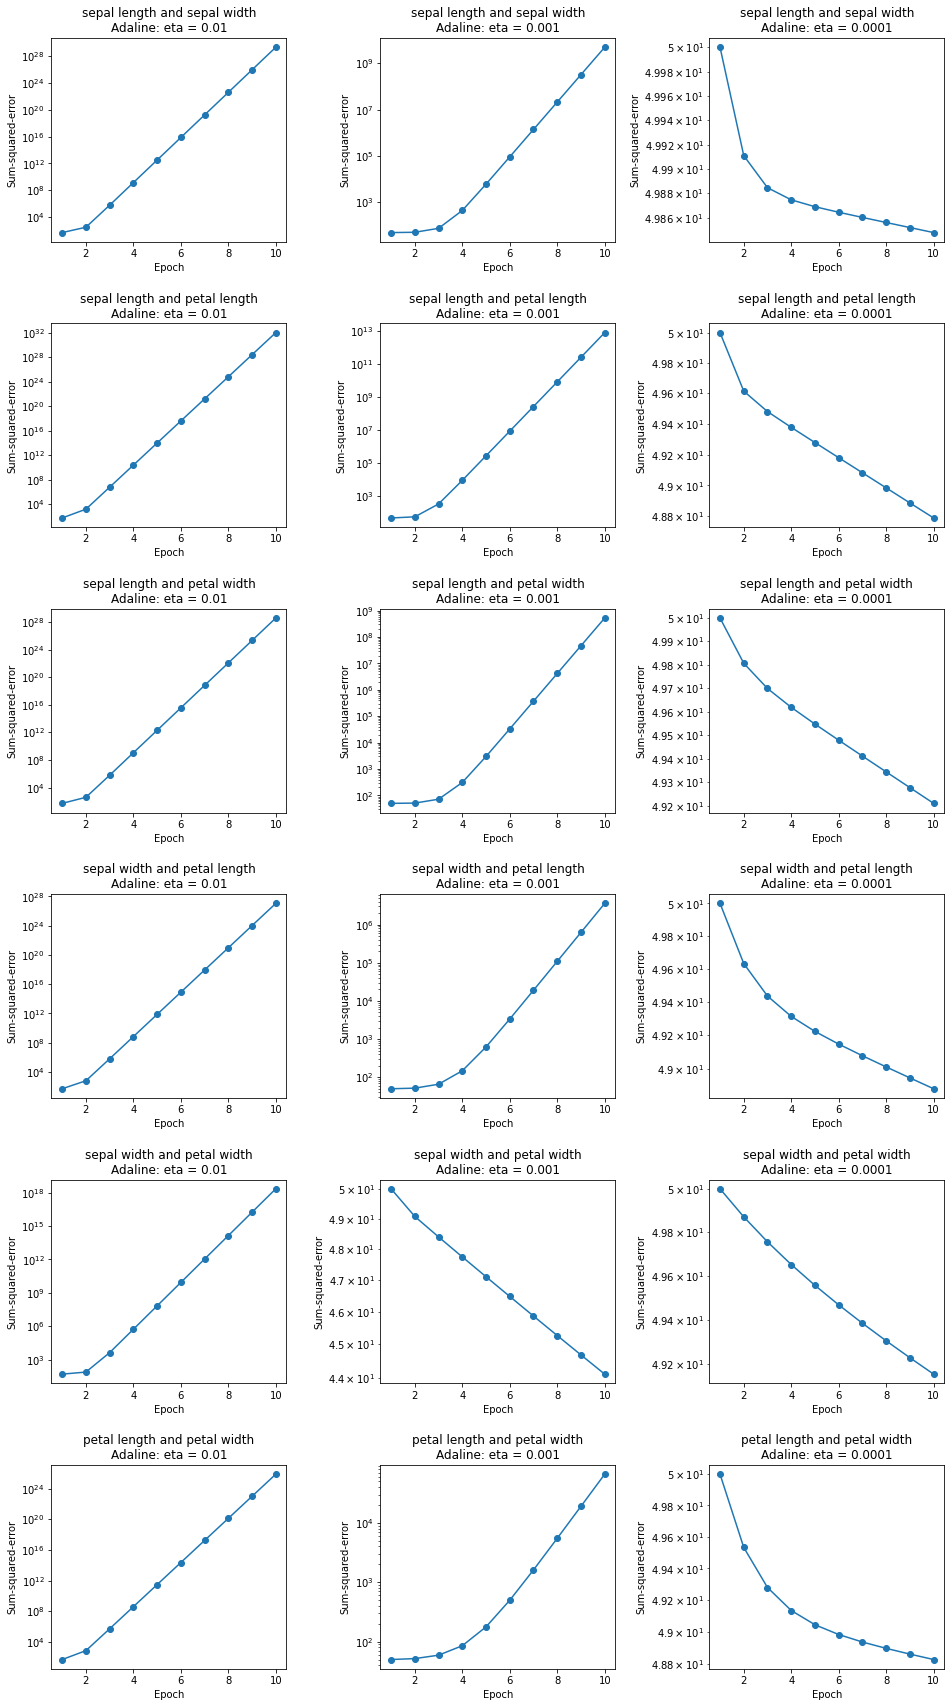

In [6]:
# Focusing on species : Iris-virginica and Iris-versicolor
# Six cases of using two features
# Before standardization, cost vs epoch

fig, ax = plt.subplots(nrows=6, ncols= 3, figsize=(16, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(6):
  for j in range(3):
    ada = AdalineGD(n_iter=10, eta=0.01/10**j).fit(XF[i], y)
    ax[i,j].semilogy(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
    ax[i,j].set_xlabel('Epoch')
    ax[i,j].set_ylabel('Sum-squared-error')
    ax[i,j].set_title(XFname[i][0] + ' and ' + XFname[i][1] + 
                    '\nAdaline: eta = ' + str(ada.eta), fontsize = 'large')




In [7]:
# Standardize Inputs
X_std = np.copy(XF)

for i in range(len(XF)):
  X_std[i][:, 0] = (XF[i][:, 0] - XF[i][:, 0].mean()) / XF[i][:, 0].std()
  X_std[i][:, 1] = (XF[i][:, 1] - XF[i][:, 1].mean()) / XF[i][:, 1].std()

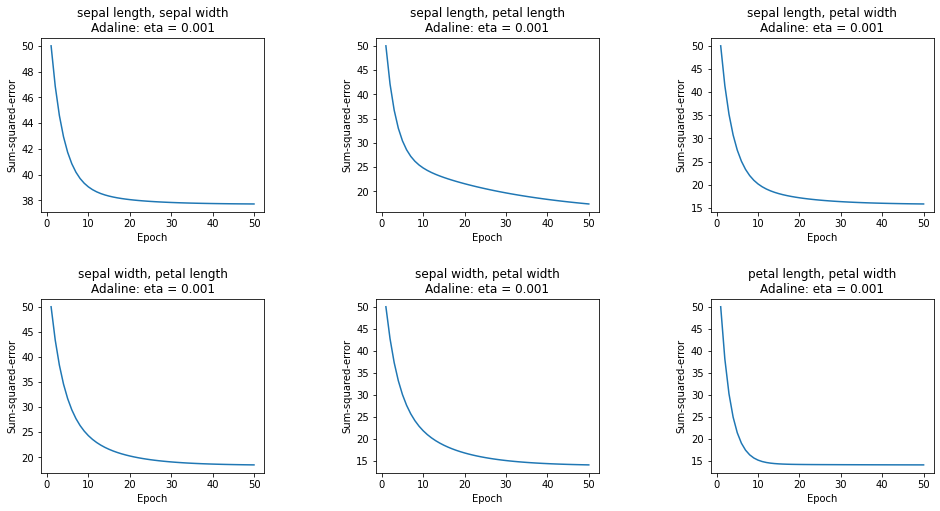

In [8]:
# After Standardization
fig, ax = plt.subplots(nrows=2, ncols= 3, figsize=(16, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

n=0
for i in range(2):
  for j in range(3):
    ada = AdalineGD(n_iter=50, eta=0.001)
    ada.fit(X_std[n], y)
    ax[i,j].plot(range(1, len(ada.cost_) + 1), ada.cost_)
    ax[i,j].set_xlabel('Epoch')
    ax[i,j].set_ylabel('Sum-squared-error')
    ax[i,j].set_title(XFname[n][0] + ', ' + XFname[n][1] +
                    '\nAdaline: eta = ' + str(ada.eta), fontsize = 'large')
    n += 1

## 1) Sepal Length & Sepal Width

Accuracy: 0.75


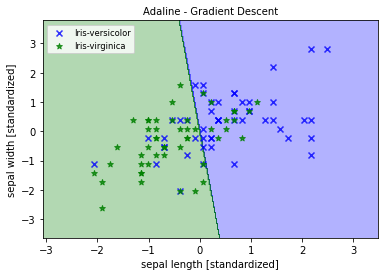

In [9]:
# 1st Permutation
ada = AdalineGD(n_iter=50, eta = 0.003)
ada.fit(X_std[0], y)

plot_decision_regions(X_std[0], y, classifier=ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel(XFname[0][0] + ' [standardized]')
plt.ylabel(XFname[0][1] + ' [standardized]')
plt.legend(loc='upper left', fontsize='small')

print('Accuracy: ' + str(ada.accuracy(X_std[0], y)))

## 2) Sepal Length & Petal Length

Accuracy: 0.94


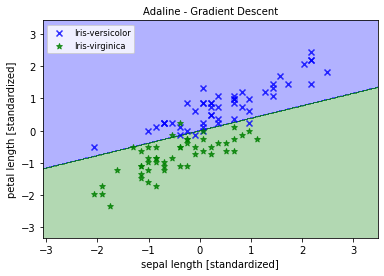

In [10]:
# 2nd Permutation
ada = AdalineGD(n_iter=50, eta = 0.003)
ada.fit(X_std[1], y)

plot_decision_regions(X_std[1], y, classifier=ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel(XFname[1][0] + ' [standardized]')
plt.ylabel(XFname[1][1] + ' [standardized]')
plt.legend(loc='upper left', fontsize='small')

print('Accuracy: ' + str(ada.accuracy(X_std[1], y)))

## 3) Sepal Length & Petal Width

Accuracy: 0.94


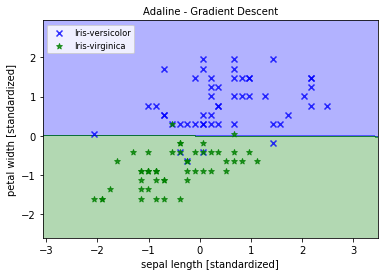

In [11]:
# 3rd Permutation
ada = AdalineGD(n_iter=50, eta = 0.003)
ada.fit(X_std[2], y)

plot_decision_regions(X_std[2], y, classifier=ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel(XFname[2][0] + ' [standardized]')
plt.ylabel(XFname[2][1] + ' [standardized]')
plt.legend(loc='upper left', fontsize='small')

print('Accuracy: ' + str(ada.accuracy(X_std[2], y)))

## 4) Sepal Width & Petal Length

Accuracy: 0.9299999999999999


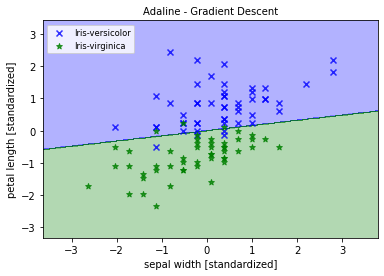

In [12]:
# 4th Permutation
ada = AdalineGD(n_iter=50, eta = 0.003)
ada.fit(X_std[3], y)

plot_decision_regions(X_std[3], y, classifier=ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel(XFname[3][0] + ' [standardized]')
plt.ylabel(XFname[3][1] + ' [standardized]')
plt.legend(loc='upper left', fontsize='small')

print('Accuracy: ' + str(ada.accuracy(X_std[3], y)))

## 5) Sepal Width & Petal Width

Accuracy: 0.95


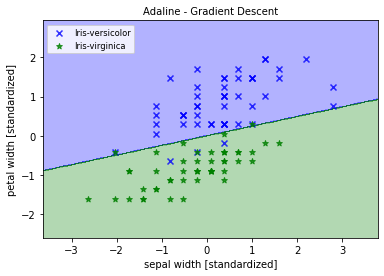

In [13]:
# 5th Permutation
ada = AdalineGD(n_iter=50, eta = 0.003)
ada.fit(X_std[4], y)

plot_decision_regions(X_std[4], y, classifier=ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel(XFname[4][0] + ' [standardized]')
plt.ylabel(XFname[4][1] + ' [standardized]')
plt.legend(loc='upper left', fontsize='small')

print('Accuracy: ' + str(ada.accuracy(X_std[4], y)))

## 6) Petal Length & Petal Width

Accuracy: 0.94


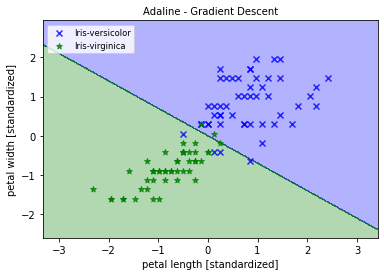

In [14]:
# 6th Permutation
ada = AdalineGD(n_iter=20, eta = 0.003)
ada.fit(X_std[5], y)

plot_decision_regions(X_std[5], y, classifier=ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel(XFname[5][0] + ' [standardized]')
plt.ylabel(XFname[5][1] + ' [standardized]')
plt.legend(loc='upper left', fontsize='small')

print('Accuracy: ' + str(ada.accuracy(X_std[5], y)))

---

# **Four Cases Using Three Features**

In [15]:
# 4 Permutations
# Iris Classifications
%matplotlib inline
# select Versicolor and Virginica
y = df.iloc[50:150,4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

# extract: sepal length | sepal width | petal length
X = df.iloc[50:150, [0,1,2]].values

# extract: sepal length | sepal width | petal width
X2 = df.iloc[50:150, [0,1,3]].values

# extract: sepal length | petal length | petal width
X3 = df.iloc[50:150, [0,2,3]].values

# extract: sepal width | pteal length | petal width
X4 = df.iloc[50:150, [1,2,3]].values


XSET = np.array([X, X2, X3, X4])
XFname = np.array([['sepal length', 'sepal width', 'petal length'], 
                  ['sepal length', 'sepal width', 'petal width'], 
                  ['sepal length', 'petal length', 'petal width'], 
                  ['sepal width', 'petal length', 'petal width']])

In [16]:
# Standardize Inputs
# 3 features
X_std = np.copy(XSET)

for i in range(len(XSET)):
  X_std[i][:, 0] = (XSET[i][:, 0] - XSET[i][:, 0].mean()) / XSET[i][:, 0].std()
  X_std[i][:, 1] = (XSET[i][:, 1] - XSET[i][:, 1].mean()) / XSET[i][:, 1].std()
  X_std[i][:, 2] = (XSET[i][:, 2] - XSET[i][:, 2].mean()) / XSET[i][:, 2].std()

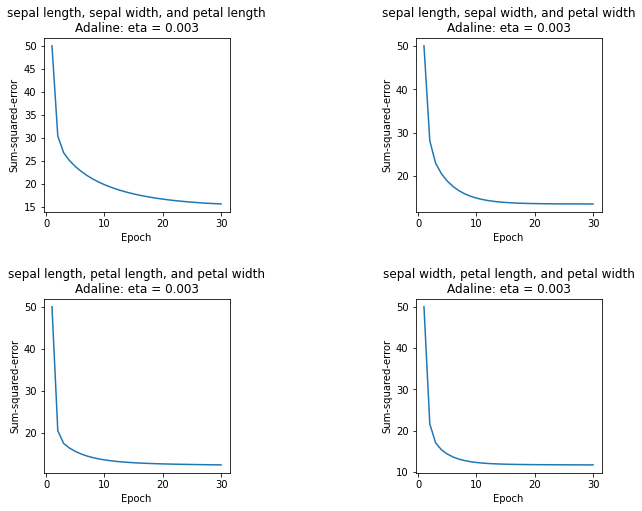

In [17]:
fig, ax = plt.subplots(nrows=2, ncols= 2, figsize=(10, 8))
plt.subplots_adjust(wspace=1, hspace=0.5)

ada = AdalineGD(n_iter=30, eta=0.003)

n=0
for i in range(2):
  for j in range(2):
    ada.fit(X_std[n], y)
    ax[i,j].plot(range(1, len(ada.cost_) + 1), ada.cost_)
    ax[i,j].set_xlabel('Epoch')
    ax[i,j].set_ylabel('Sum-squared-error')
    ax[i,j].set_title(XFname[n][0] + ', ' + XFname[n][1] + ', and ' + XFname[n][2] +
                    '\nAdaline: eta = ' + str(ada.eta), fontsize = 'large')
    # print('Accuracy: ' + str(ada.accuracy(X_std[n], y)))
    n += 1

## 1) Sepal Length, Sepal Width, & Petal Length

In [18]:
ada.fit(X_std[0], y)
print('Accuracy: ' + str(ada.accuracy(X_std[0], y)))

Accuracy: 0.95


## 2) Sepal Length, Sepal Width, & Petal Width

In [19]:
ada.fit(X_std[1], y)
print('Accuracy: ' + str(ada.accuracy(X_std[1], y)))

Accuracy: 0.95


## 3) Sepal Length, Petal Length, & Petal Width

In [20]:
ada.fit(X_std[2], y)
print('Accuracy: ' + str(ada.accuracy(X_std[2], y)))

Accuracy: 0.96


## 4) Sepal Width, Petal Length, & Petal Width

In [21]:
ada.fit(X_std[3], y)
print('Accuracy: ' + str(ada.accuracy(X_std[3], y)))

Accuracy: 0.96


---

# **One Case Using All Features**

In [22]:
# 1 Permutation using all 4 features
y = df.iloc[50:150,4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

X = df.iloc[50:150, [0,1,2,3]].values
XFname = np.array([['sepal length', 'sepal width', 'petal length', 'petal width']])

In [23]:
# Standardize Inputs
# 4 features
X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

Text(0.5, 1.0, 'All features \nAdaline: eta = 0.003')

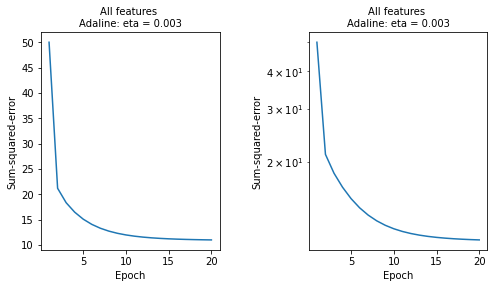

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ada = AdalineGD(n_iter=20, eta=0.003)
ada.fit(X_std, y)

ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('All features \nAdaline: eta = 0.003', fontsize='medium')

ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('All features \nAdaline: eta = 0.003', fontsize='medium')


In [25]:
print('Accuracy: ' + str(ada.accuracy(X_std, y)))

Accuracy: 0.98


----
# **Summary**
**Name:** Luigi Otoya
## **-Accuracy Table**
|                 | Two Features | Three Features | Four Features |
|:-|:-:|:-:|:-:|
|**CASE 1**       |     0.75     |      0.95      |    **0.98**   |
|**CASE 2**       |     0.94     |      0.95      |      N/A      |
|**CASE 3**       |     0.94     |      0.96      |      N/A      |
|**CASE 4**       |     0.929    |      0.96      |      N/A      |
|**CASE 5**       |     0.95     |      N/A       |      N/A      |
|**CASE 6**       |     0.94     |      N/A       |      N/A      |
|**Average**      |     0.91     |     ~0.96     |    **0.98**   |

## **-Findings**
### From the results given in the table above, the best result in terms of accuracy is in the case  
### when all four features are used. We can see that when less features are used, the accuracy
### is generally less than when more features are used. The average accuracy when using two features
### is 91%. If we increase the number of features to three, the average accuracy increases to about
### 96%. And finally when using all four features, where in which there is only one case, the accuracy
### is 98%. Hence, it can be determined that if the dimesions used in the model are increased, then
### the accuracy of the model also increases.

